Code File : https://github.com/misrapk/Deep-Learning-Course-YT/blob/main/NLP/ResumeMatcher.ipynb

In [1]:
## STEP 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
import warnings
warnings.filterwarnings('ignore')

random.seed(42)
np.random.seed(42)


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## STEP 2  - STOPWORD ko define karege

In [2]:


import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
stop_words = stopwords.words('english')

len(stop_words)

198

In [4]:
list(stop_words)[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

## STEP 3 - Data Template - INput Data (Random data)

In [5]:
# Job Description ke parts
job_description_parts = {
    "role": [
        "Senior Data Scientist",
        "Machine Learning Engineer",
        "Data Analyst",
        "NLP Engineer",
        "ML Operations Engineer"
    ],

    "responsibilities": [
        [
            "develop machine learning models for predictive analytics",
            "analyze large datasets to drive business insights",
            "implement data pipelines using Python and SQL",
            "collaborate with cross-functional teams on data initiatives"
        ],
        [
            "design and build deep learning systems for production",
            "optimize neural network architectures for inference",
            "conduct research on state-of-the-art NLP techniques",
            "deploy models using Docker and Kubernetes"
        ],
        [
            "perform exploratory data analysis on business metrics",
            "create dashboards for stakeholder reporting",
            "develop statistical models for customer behavior prediction",
            "maintain data quality and governance standards"
        ],
        [
            "build NLP pipelines for text classification and entity recognition",
            "fine-tune transformer models for specific use cases",
            "implement named entity recognition systems",
            "develop chatbots using sequence-to-sequence models"
        ]
    ],

    "requirements": [
        [
            "5+ years experience in data science and machine learning",
            "proficiency in Python, R, and SQL",
            "strong understanding of statistical concepts",
            "experience with scikit-learn, TensorFlow, or PyTorch"
        ],
        [
            "masters degree in computer science or related field",
            "3+ years building production ML systems",
            "expertise in deep learning frameworks",
            "familiarity with cloud platforms like AWS or GCP"
        ],
        [
            "proficiency in Python and SQL",
            "knowledge of Tableau or PowerBI for visualization",
            "understanding of business metrics and KPIs",
            "experience with data warehousing tools"
        ]
    ]
}

# Resume ke parts
resume_parts = {
    "experience": [
        [
            "developed machine learning models using TensorFlow and PyTorch",
            "optimized data pipelines reducing processing time by 60%",
            "deployed Python Flask applications on AWS EC2 instances",
            "implemented scikit-learn models achieving 95% accuracy"
        ],
        [
            "built neural networks for image classification tasks",
            "performed feature engineering on large-scale datasets",
            "collaborated with product teams on model implementation",
            "reduced model inference latency from 500ms to 50ms"
        ],
        [
            "analyzed customer behavior using statistical methods",
            "created dashboards in Tableau for executive reporting",
            "performed SQL queries on petabyte-scale databases",
            "improved data quality by implementing validation frameworks"
        ],
        [
            "implemented NLP models for text classification",
            "built transformers for named entity recognition",
            "developed chatbots using sequence models",
            "fine-tuned BERT for domain-specific applications"
        ]
    ],

    "skills": [
        ["Python", "Machine Learning", "TensorFlow", "SQL", "Statistics"],
        ["Deep Learning", "PyTorch", "NLP", "Transformers", "BERT"],
        ["Data Analysis", "Python", "SQL", "Tableau", "Excel"],
        ["NLP", "Python", "Hugging Face", "Transformers", "Information Extraction"]
    ],

    "education": [
        "B.Tech Computer Science from IIT",
        "M.S. Data Science from top university",
        "B.E. Electronics and Communication",
        "M.Tech Machine Learning from premiere institute"
    ]
}

In [6]:
print(f"   - Job role types: {len(job_description_parts['role'])}")
print(f"   - Resume types: {len(resume_parts['experience'])}")

   - Job role types: 5
   - Resume types: 4


#### Gemerate the sample data

In [7]:
def generate_job_desc(n_jobs=3):
  

    jobs = []

    for i in range(n_jobs):
        # Cycle through roles (first 3 get different roles)
        role_idx = i % len(job_description_parts['role'])
        role = job_description_parts['role'][role_idx]

        # Pick corresponding responsibilities and requirements
        responsibilities = job_description_parts['responsibilities'][role_idx]
        requirements = job_description_parts['requirements'][role_idx]

        # Create full JD text
        description = f"""
        JOB DESCRIPTION: {role}

        Responsibilities:
        {'. '.join(responsibilities)}.

        Requirements:
        {'. '.join(requirements)}.

        We are looking for talented professionals to join our team.
        """

        jobs.append({
            'job_id': f'JD_{i+1}',
            'title': role,
            'description': description
        })

    return jobs


In [8]:
def generate_resumes(n_resumes=10):
   

    resumes = []

    for i in range(n_resumes):
        # Cycle through experience types
        exp_idx = i % len(resume_parts['experience'])
        experience = resume_parts['experience'][exp_idx]
        skills = resume_parts['skills'][exp_idx]
        education = random.choice(resume_parts['education'])
        years_exp = random.randint(1, 10)

        candidate_name = f"Candidate_{i+1}"

        resume_text = f"""
        RESUME: {candidate_name}

        Education:
        {education}

        Years of Experience: {years_exp} years

        Professional Experience:
        {'. '.join(experience)}.

        Technical Skills:
        {', '.join(skills)}

        Contact: {candidate_name.lower()}@email.com | +91-9XXXXXXXXX
        """

        resumes.append({
            'resume_id': f'RES_{i+1}',
            'candidate_name': candidate_name,
            'years_experience': years_exp,
            'resume_text': resume_text
        })

    return resumes



In [9]:
jobs = generate_job_desc(3)
resumes = generate_resumes(12)

In [10]:
len(jobs), len(resumes)

(3, 12)

## Step 4 - Text Preprocessing

1. Lowercase
2. Remove Special Character
3. Remove extra spaces
4. Tokenization
5. Remove stopwords
6. Filter Short Tokens

In [11]:
def clean_text(text):
    text = text.lower()
    
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    tokens = text.split()
    
    tokens = [
        token for token in tokens if token not in stop_words and len(token)>1
    ]
    
    cleanedText = ' '.join(tokens)
    
    return cleanedText

In [12]:
clean_text('I am a good programmer, and i love to teach and code ;;jfdlkj2lkj     dkkjad;flkj  ')

'good programmer love teach code jfdlkj2lkj dkkjad flkj'

In [13]:
print("CLEANING TEXT.....")
print("-"*80)

cleaned_jobs = []
for job in jobs:
    cleaned_desc = clean_text(job['description'])
    cleaned_jobs.append({
        'job_id': job['job_id'],
        'title': job['title'],
        'original_text': job['description'],
        'cleaned_text': cleaned_desc
    })

print("BEFORE CLEANING")
print(jobs[0]['description'][:100])
print("-"*80)

print("After CLEANING")
print(cleaned_jobs[0]['cleaned_text'][:100])
print("-"*80)

CLEANING TEXT.....
--------------------------------------------------------------------------------
BEFORE CLEANING

        JOB DESCRIPTION: Senior Data Scientist

        Responsibilities:
        develop machine l
--------------------------------------------------------------------------------
After CLEANING
job description senior data scientist responsibilities develop machine learning models predictive an
--------------------------------------------------------------------------------


In [14]:
cleaned_resumes = []
for resume in resumes:
    cleaned_res = clean_text(resume['resume_text'])
    cleaned_resumes.append({
        'resume_id': resume['resume_id'],
        'candidate_name': resume['candidate_name'],
        'years_experience': resume['years_experience'],
        'original_text': resume['resume_text'],
        'cleaned_text': cleaned_res
    })
    
    

print("BEFORE CLEANING")
print(resumes[0]['resume_text'][:100])
print("-"*80)

print("After CLEANING")
print(cleaned_resumes[0]['cleaned_text'][:100])
print("-"*80)

BEFORE CLEANING

        RESUME: Candidate_1

        Education:
        B.Tech Computer Science from IIT

        Y
--------------------------------------------------------------------------------
After CLEANING
resume candidate education tech computer science iit years experience years professional experience 
--------------------------------------------------------------------------------


## Step 5 Vectorizationj - TFIDF

In [15]:
all_cleaned_text = []
text_sources = []


for job in cleaned_jobs:
    all_cleaned_text.append(job['cleaned_text'])
    text_sources.append({'type': 'job', 'id': job['job_id'], 'title': job['title']})
    

for resume in cleaned_resumes:
    all_cleaned_text.append(resume['cleaned_text'])
    text_sources.append({'type': 'resume', 'id': resume['resume_id'], 'name':resume['candidate_name']})
    
print(f"✅ Total texts to vectorize: {len(all_cleaned_text)}")
print(f"   - Jobs: {len(cleaned_jobs)}")
print(f"   - Resumes: {len(cleaned_resumes)}\n")
    

✅ Total texts to vectorize: 15
   - Jobs: 3
   - Resumes: 12



In [16]:
# TFIDF
vectorizer = TfidfVectorizer(
    max_features = 5000,
    ngram_range= (1,2),
    min_df = 2,
    max_df = 0.8, 
    lowercase=True,
    stop_words = 'english'
)

In [17]:
tfidf_matrix = vectorizer.fit_transform(all_cleaned_text)

In [18]:

print(f"✅ Vectorization complete!\n")
print(f"Matrix Details:")
print(f"   Shape: {tfidf_matrix.shape}")
print(f"   → {tfidf_matrix.shape[0]} documents (rows)")
print(f"   → {tfidf_matrix.shape[1]} features (columns)")
print(f"   → Sparsity: {(1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100:.2f}%")
print(f"      (High sparsity = memory efficient! Mostly zeros)\n")


✅ Vectorization complete!

Matrix Details:
   Shape: (15, 281)
   → 15 documents (rows)
   → 281 features (columns)
   → Sparsity: 72.12%
      (High sparsity = memory efficient! Mostly zeros)



In [19]:
# Show vocabulary sample
feature_names = vectorizer.get_feature_names_out()
print(f"📚 Vocabulary size: {len(feature_names)}")
print(f"   Sample terms: {list(feature_names[:15])}\n")

# Separate job and resume vectors
n_jobs = len(cleaned_jobs)
n_resumes = len(cleaned_resumes)

job_vectors = tfidf_matrix[:n_jobs]
resume_vectors = tfidf_matrix[n_jobs:]

print(f"✅ Vectors separated:")
print(f"   Job vectors: {job_vectors.shape}")
print(f"   Resume vectors: {resume_vectors.shape}")

📚 Vocabulary size: 281
   Sample terms: ['10', '10 years', '500ms', '500ms 50ms', '50ms', '50ms technical', '60', '60 deployed', '91', '91 9xxxxxxxxx', '95', '95 accuracy', '9xxxxxxxxx', 'accuracy', 'accuracy technical']

✅ Vectors separated:
   Job vectors: (3, 281)
   Resume vectors: (12, 281)


## Step 6 Cosine Similarity

In [20]:
all_results = []

for job_id, job in enumerate(cleaned_jobs):
    print(f"\n📋 JOB: {job['title']} (ID: {job['job_id']})")
    print("-" * 70)
    # print(job_vectors[job_id])
    job_vector = job_vectors[job_id]
    
    similarities = cosine_similarity(job_vector, resume_vectors)
    # print(similarities)
    
    #flat to 1d array
    flat_similarities = similarities.flatten()
    
    
    #store the result
    
    for resume_idx, resume in enumerate(cleaned_resumes):
        score = flat_similarities[resume_idx]
        
        all_results.append({
            'job_id': job['job_id'],
            'job_title': job['title'],
            'resume_id': resume['resume_id'],
            'candidate_name': resume['candidate_name'],
            'years_experience': resume['years_experience'],
            'similarity_score': score
        })
        
    # Print top 3 matches for this job
    top_k = 3
    top_indices = np.argsort(flat_similarities)[::-1][:top_k]

    print(f"\n🏆 Top {top_k} Matching Candidates:")
    print()

    for rank, resume_idx in enumerate(top_indices, 1):
        score = flat_similarities[resume_idx]
        candidate = cleaned_resumes[resume_idx]
        score_percent = score * 100

        # Visual bar
        bar_length = int(score_percent / 5)
        bar = "█" * bar_length + "░" * (20 - bar_length)

        print(f"{rank}. {candidate['candidate_name']} ({candidate['years_experience']} yrs)")
        print(f"   Score: {score:.4f} ({score_percent:.1f}%)")
        print(f"   {bar}")
        print()
        
        
        
    


📋 JOB: Senior Data Scientist (ID: JD_1)
----------------------------------------------------------------------

🏆 Top 3 Matching Candidates:

1. Candidate_9 (9 yrs)
   Score: 0.2862 (28.6%)
   █████░░░░░░░░░░░░░░░

2. Candidate_1 (1 yrs)
   Score: 0.2862 (28.6%)
   █████░░░░░░░░░░░░░░░

3. Candidate_5 (10 yrs)
   Score: 0.2804 (28.0%)
   █████░░░░░░░░░░░░░░░


📋 JOB: Machine Learning Engineer (ID: JD_2)
----------------------------------------------------------------------

🏆 Top 3 Matching Candidates:

1. Candidate_6 (1 yrs)
   Score: 0.1749 (17.5%)
   ███░░░░░░░░░░░░░░░░░

2. Candidate_9 (9 yrs)
   Score: 0.1635 (16.4%)
   ███░░░░░░░░░░░░░░░░░

3. Candidate_1 (1 yrs)
   Score: 0.1635 (16.4%)
   ███░░░░░░░░░░░░░░░░░


📋 JOB: Data Analyst (ID: JD_3)
----------------------------------------------------------------------

🏆 Top 3 Matching Candidates:

1. Candidate_3 (3 yrs)
   Score: 0.2910 (29.1%)
   █████░░░░░░░░░░░░░░░

2. Candidate_7 (2 yrs)
   Score: 0.2694 (26.9%)
   █████░░░░░░░░

In [21]:

results_df = pd.DataFrame(all_results)

print("📊 COMPLETE MATCHING RESULTS")
print("="*100)
print()

# Sort by job and score
results_df_sorted = results_df.sort_values(
    by=['job_id', 'similarity_score'],
    ascending=[True, False]
)

# Display
print(results_df_sorted.to_string(index=False))

print("\n" + "="*100)

# Key statistics
print("\n📈 KEY STATISTICS:")
print("-" * 100)

print("\n1. Average match scores by job:")
for job_id in results_df['job_id'].unique():
    job_data = results_df[results_df['job_id'] == job_id]
    job_title = job_data['job_title'].iloc[0]
    avg_score = job_data['similarity_score'].mean()
    max_score = job_data['similarity_score'].max()

    print(f"\n   {job_title} ({job_id}):")
    print(f"      Average: {avg_score:.4f}")
    print(f"      Best: {max_score:.4f}")

print("\n2. Top candidates (highest average across all jobs):")
candidate_avg = results_df.groupby('candidate_name')['similarity_score'].mean().sort_values(ascending=False)
print()
for candidate, score in candidate_avg.head(5).items():
    print(f"   {candidate}: {score:.4f}")


📊 COMPLETE MATCHING RESULTS

job_id                 job_title resume_id candidate_name  years_experience  similarity_score
  JD_1     Senior Data Scientist     RES_1    Candidate_1                 1          0.286214
  JD_1     Senior Data Scientist     RES_9    Candidate_9                 9          0.286214
  JD_1     Senior Data Scientist     RES_5    Candidate_5                10          0.280361
  JD_1     Senior Data Scientist     RES_3    Candidate_3                 3          0.167938
  JD_1     Senior Data Scientist    RES_11   Candidate_11                 4          0.166070
  JD_1     Senior Data Scientist     RES_7    Candidate_7                 2          0.132806
  JD_1     Senior Data Scientist    RES_10   Candidate_10                 9          0.102488
  JD_1     Senior Data Scientist     RES_6    Candidate_6                 1          0.101239
  JD_1     Senior Data Scientist     RES_8    Candidate_8                 4          0.071957
  JD_1     Senior Data Scientis

## Step 7 - Visualisation

In [31]:
fig=plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

In [41]:
pivot_data = results_df.pivot_table(
    values='similarity_score',
    index='candidate_name',
    columns = 'job_title',
    aggfunc = 'first'
)
pivot_data

job_title,Data Analyst,Machine Learning Engineer,Senior Data Scientist
candidate_name,,,
Candidate_1,0.055643,0.163535,0.286214
Candidate_10,0.024330,0.142553,0.102488
Candidate_11,0.265181,0.063865,0.166070
Candidate_12,0.019364,0.083239,0.068131
Candidate_2,0.000000,0.144594,0.064955
Candidate_3,0.290962,0.031074,0.167938
Candidate_4,0.020137,0.078547,0.034455
Candidate_5,0.054505,0.160190,0.280361
Candidate_6,0.000000,0.174910,0.101239


Text(0.5, 1.0, 'Resume Job Matching heatmap\n(Green = better Match)')

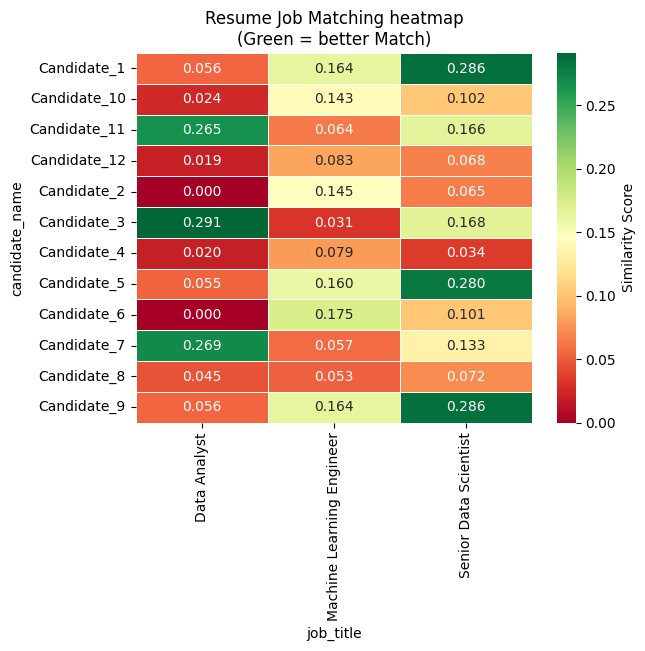

In [48]:
sns.heatmap(
    pivot_data, 
    annot=True,
    fmt='.3f',
    linewidths=0.5,
    cmap='RdYlGn',
    cbar_kws={'label': 'Similarity Score'}
)
plt.title('Resume Job Matching heatmap\n(Green = better Match)')


In [52]:
## Bar Chart - Top Candidates

top_candidates = results_df.sort_values('similarity_score', ascending =False).groupby('job_id').head(3)

top_candidates

,job_id,job_title,resume_id,candidate_name,years_experience,similarity_score
26,JD_3,Data Analyst,RES_3,Candidate_3,3,0.290962
0,JD_1,Senior Data Scientist,RES_1,Candidate_1,1,0.286214
8,JD_1,Senior Data Scientist,RES_9,Candidate_9,9,0.286214
4,JD_1,Senior Data Scientist,RES_5,Candidate_5,10,0.280361
30,JD_3,Data Analyst,RES_7,Candidate_7,2,0.269434
34,JD_3,Data Analyst,RES_11,Candidate_11,4,0.265181
17,JD_2,Machine Learning Engineer,RES_6,Candidate_6,1,0.174910
12,JD_2,Machine Learning Engineer,RES_1,Candidate_1,1,0.163535
20,JD_2,Machine Learning Engineer,RES_9,Candidate_9,9,0.163535


Text(0, 0.5, 'JObs')

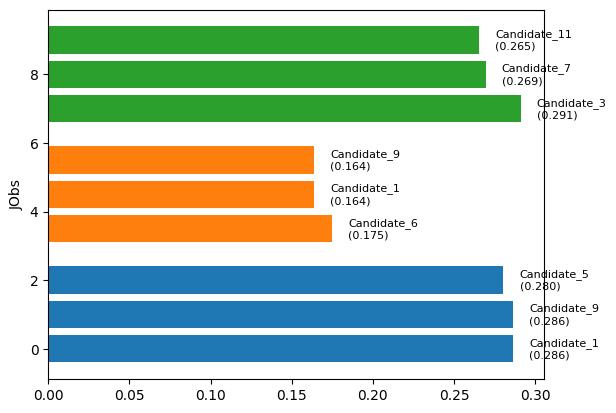

In [ ]:
for i, job_id in enumerate(results_df['job_id'].unique()):
    job_data = top_candidates[top_candidates['job_id'] == job_id]
    
    
    y_pos = np.arange(len(job_data))
    plt.barh(y_pos+i * 3.5, job_data['similarity_score'].values, 
             label = job_id)
    
    for j, (idx, row) in enumerate(job_data.iterrows()):
        plt.text(row['similarity_score'] + 0.01, j+i *3.5, 
                 f"{row['candidate_name']}\n({row['similarity_score']:.3f})",
                 va='center', fontsize=8)
        
    
plt.ylabel("JObs")

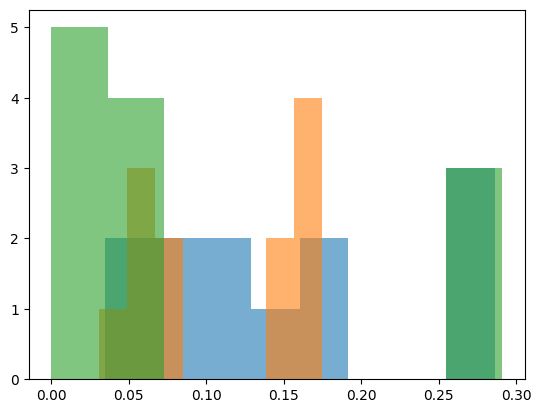

In [73]:
# Score Distribution

for job_title in results_df['job_title'].unique():
    # print(job_title)
    scores = results_df[results_df['job_title']==job_title]['similarity_score']
    plt.hist(scores, label=job_title, alpha=0.6, bins=8)

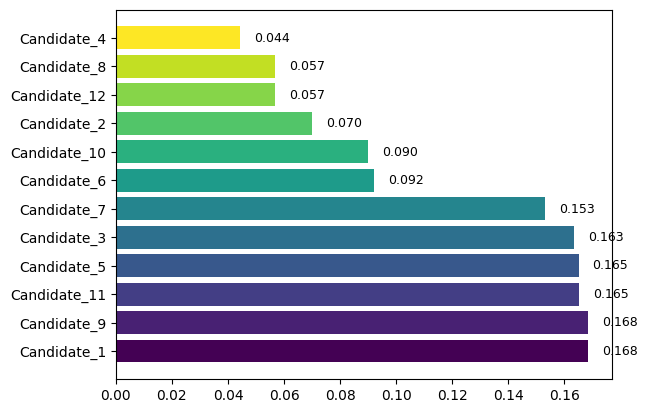

In [92]:
candidate_av_score = results_df.groupby('candidate_name')['similarity_score'].mean().sort_values(ascending=False)

plt.barh(candidate_av_score.index,
         candidate_av_score.values, 
         color = plt.cm.viridis(np.linspace(0,1,len(candidate_av_score))))

for i, (idx, val) in enumerate(candidate_av_score.items()):
    plt.text(val + 0.005, i, f'{val:.3f}', va='center', fontsize=9)

### Combining all graph

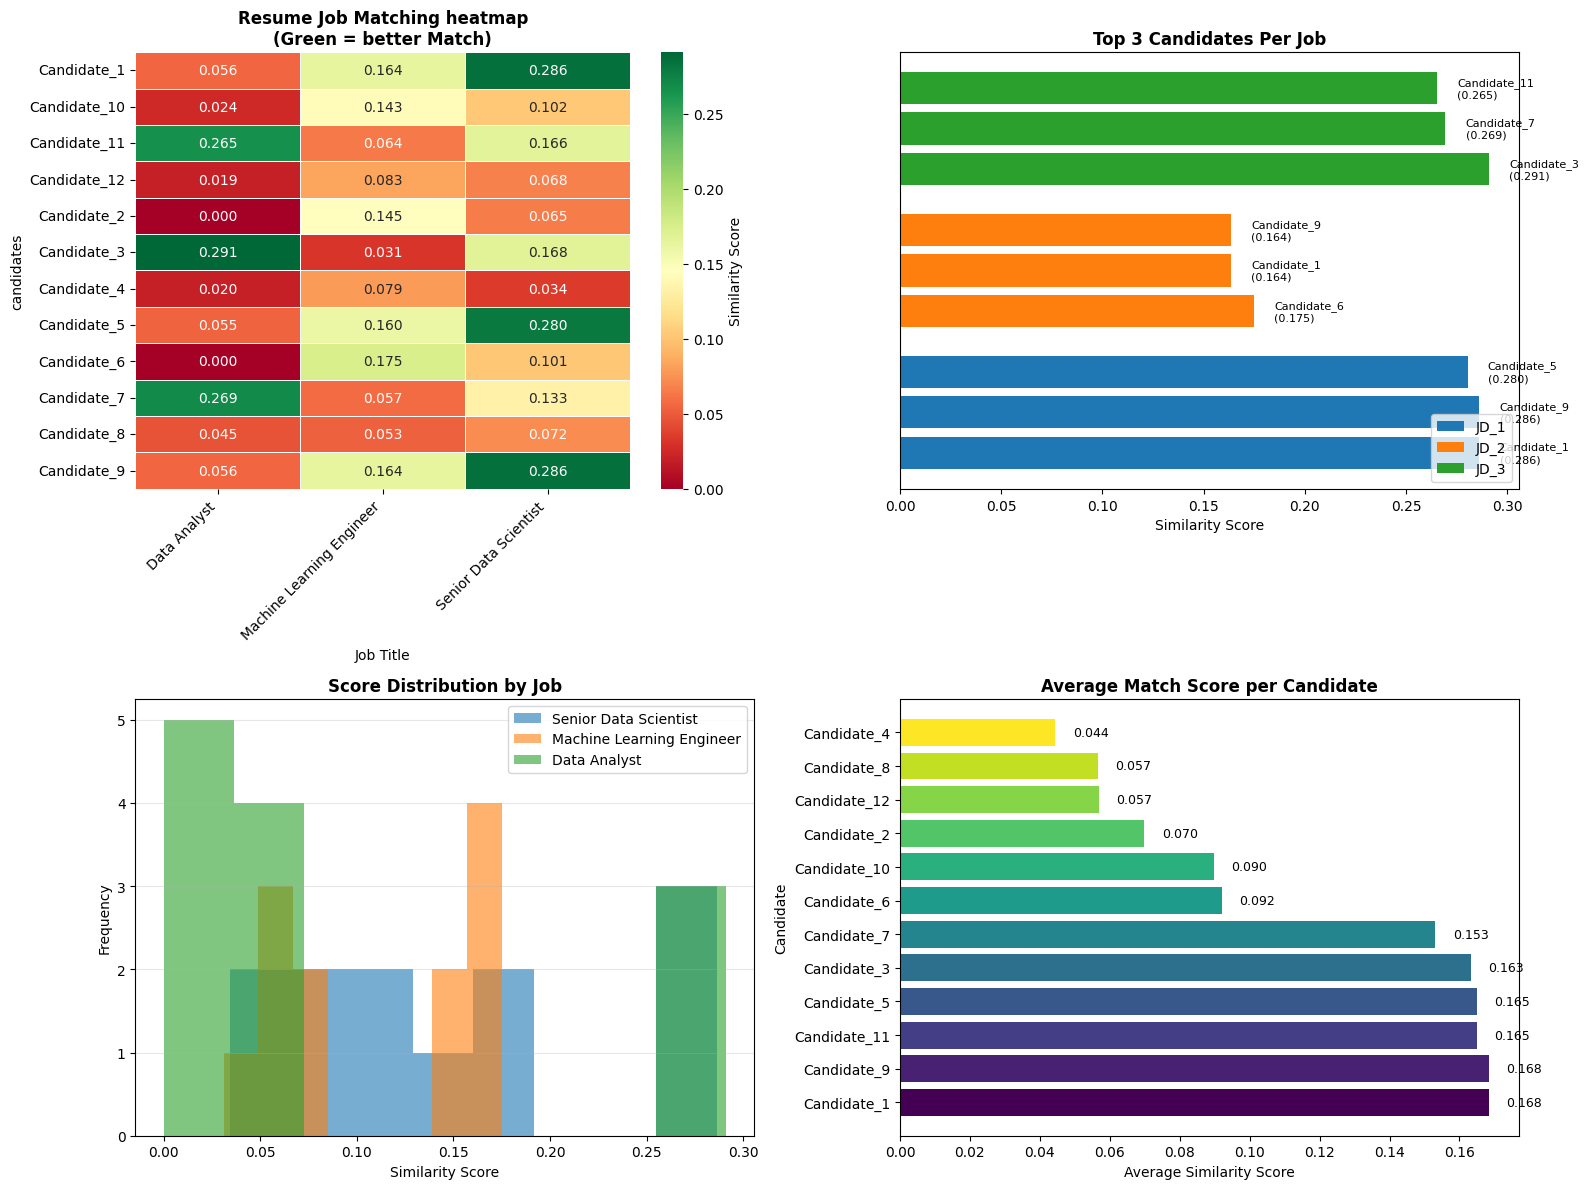

In [112]:
fig = plt.figure(figsize=(16,12))


#plt1
ax1 = plt.subplot(2,2,1)
pivot_data = results_df.pivot_table(
    values='similarity_score',
    index='candidate_name',
    columns = 'job_title',
    aggfunc = 'first'
)
sns.heatmap(
    pivot_data, 
    annot=True,
    fmt='.3f',
    linewidths=0.5,
    cmap='RdYlGn',
    cbar_kws={'label': 'Similarity Score'},
    ax=ax1
)
ax1.set_title('Resume Job Matching heatmap\n(Green = better Match)',fontsize=12, fontweight='bold')
ax1.set_xlabel('Job Title', fontsize=10)
ax1.set_ylabel('candidates', fontsize=10)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# ============plot 2==================
ax2=plt.subplot(2,2,2)
top_candidates = results_df.sort_values('similarity_score', ascending =False).groupby('job_id').head(3)

for i, job_id in enumerate(results_df['job_id'].unique()):
    job_data = top_candidates[top_candidates['job_id'] == job_id]
    
    
    y_pos = np.arange(len(job_data))
    ax2.barh(y_pos+i * 3.5, job_data['similarity_score'].values, 
             label = job_id)
    
    
    for j, (idx, row) in enumerate(job_data.iterrows()):
        ax2.text(row['similarity_score'] + 0.01, j+i *3.5, 
                 f"{row['candidate_name']}\n({row['similarity_score']:.3f})",
                 va='center', fontsize=8)
   
        
ax2.set_yticks([])
ax2.set_xlabel('Similarity Score', fontsize=10)
ax2.set_title('Top 3 Candidates Per Job', fontsize=12, fontweight='bold')
ax2.legend(loc='lower right')   


#==== PLOT3====

ax3 = plt.subplot(2,2,3)

for job_title in results_df['job_title'].unique():
    # print(job_title)
    scores = results_df[results_df['job_title']==job_title]['similarity_score']
    ax3.hist(scores, label=job_title, alpha=0.6, bins=8)
    
ax3.set_xlabel('Similarity Score', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.set_title('Score Distribution by Job', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)


# PLOT4

ax4 = plt.subplot(2,2,4)

candidate_av_score = results_df.groupby('candidate_name')['similarity_score'].mean().sort_values(ascending=False)

ax4.barh(candidate_av_score.index,
         candidate_av_score.values, 
         color = plt.cm.viridis(np.linspace(0,1,len(candidate_av_score))))

for i, (idx, val) in enumerate(candidate_av_score.items()):
    ax4.text(val + 0.005, i, f'{val:.3f}', va='center', fontsize=9)
    
ax4.set_xlabel('Average Similarity Score', fontsize=10)
ax4.set_ylabel('Candidate', fontsize=10)
ax4.set_title('Average Match Score per Candidate', fontsize=12, fontweight='bold')




plt.tight_layout()
plt.show()